<a href="https://colab.research.google.com/github/KunalRoutray/Deep-Learning/blob/main/Mnist_Digits_Classification_Using_LeNet5(Ass_4).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**kunal routray**

1.Load & Normalizes MNIST Dataset

In [1]:
# Import required libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, AveragePooling2D,Flatten,Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score,classification_report
import random
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Load MNIST dataset
(train_img,train_labels),(test_img,test_labels)=mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


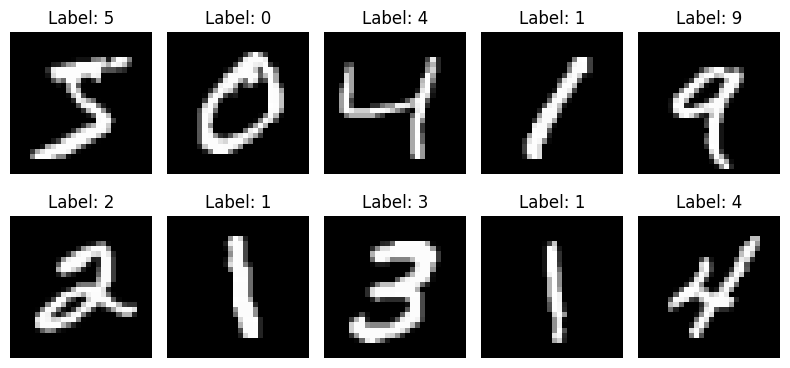

In [3]:

# Display sample images
plt.figure(figsize=(8,4))
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.imshow(train_img[i],cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()



In [4]:
train_img=train_img/255.0
test_img=test_img/255.0


In [5]:
train_img=train_img.reshape(-1,28,28,1)
test_img=test_img.reshape(-1,28,28,1)


2.LeNet-5 CNN Model Implementation

In [6]:
model=Sequential([Conv2D(filters=6, kernel_size=(5,5), activation='tanh', input_shape=(28,28,1)),
            AveragePooling2D(pool_size=(2,2)),
            Conv2D(filters=16, kernel_size=(5,5), activation='tanh'),
            AveragePooling2D(pool_size=(2,2)),
            Flatten(),
            Dense(120, activation='tanh'),
            Dense(84, activation='tanh'),
            Dense(10, activation='softmax')
            ])



3.Training the Model

In [7]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

early_stop=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)
history=model.fit(train_img,train_labels, validation_split=0.2,epochs=20,batch_size=32,callbacks=[early_stop])



Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 16ms/step - accuracy: 0.8557 - loss: 0.4841 - val_accuracy: 0.9628 - val_loss: 0.1243
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 16ms/step - accuracy: 0.9654 - loss: 0.1102 - val_accuracy: 0.9730 - val_loss: 0.0864
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 17ms/step - accuracy: 0.9769 - loss: 0.0736 - val_accuracy: 0.9754 - val_loss: 0.0758
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 38s 15ms/step - accuracy: 0.9835 - loss: 0.0524 - val_accuracy: 0.9775 - val_loss: 0.0706
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 39s 14ms/step - accuracy: 0.9875 - loss: 0.0412 - val_accuracy: 0.9764 - val_loss: 0.0782
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9896 - loss: 0.0320 - val_accuracy: 0.9811 - val_loss: 0.0650
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 25s 17ms/step - accuracy: 0.9908 - loss: 0.0282 - val_accuracy: 0.9800 - val_loss: 0.0711
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 22s 15ms/step - accuracy: 0.9930 -

In [8]:
# Evaluate on test set
test_loss, test_acc = model.evaluate(test_img, test_labels,verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")


313/313 - 2s - 5ms/step - accuracy: 0.9824 - loss: 0.0587
Test Accuracy: 0.9824
Test Loss: 0.0587


4.Analyzing Results

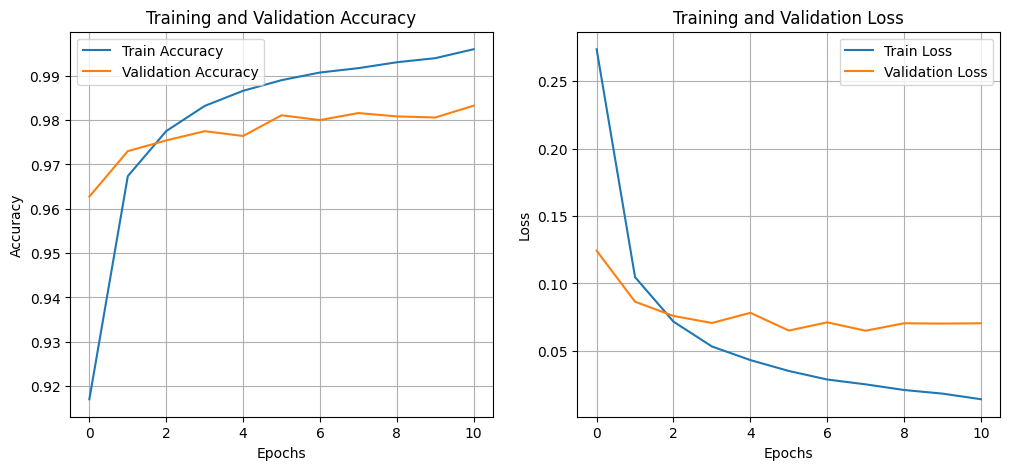

In [9]:
# Plot Training & Validation Accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")
plt.grid()

#Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title("Training and Validation Loss")
plt.grid()
plt.show()

5.Generate Classification Reports

In [10]:
labels_pred = np.argmax(model.predict(test_img), axis=1)
print(classification_report(test_labels, labels_pred))


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.98      0.99      0.98      1032
           3       0.98      0.98      0.98      1010
           4       0.98      0.99      0.98       982
           5       0.97      0.99      0.98       892
           6       0.99      0.98      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.96      0.99      0.97       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



6.visualize predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


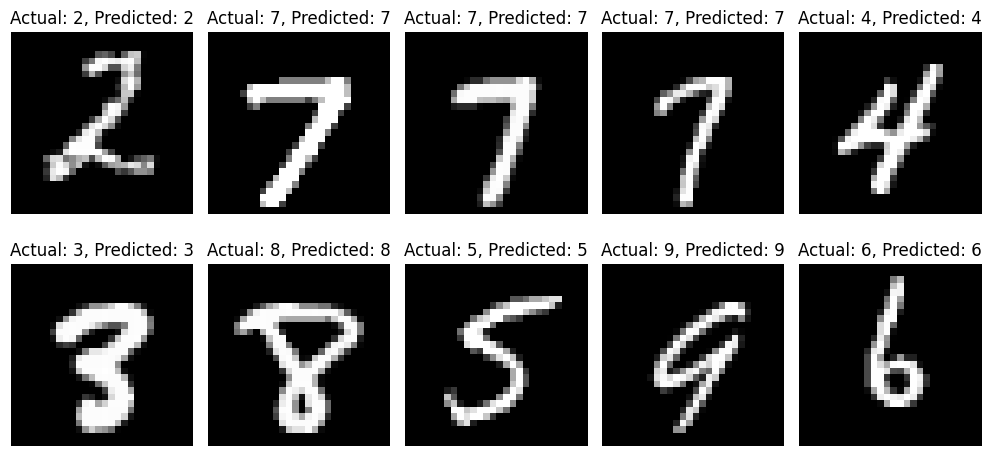

In [11]:
plt.figure(figsize=(10,5))
for i in range(10):
    index=random.randint(0,len(test_img)-1)
    img=test_img[index]
    actual=test_labels[index]
    prediction=np.argmax(model.predict(img.reshape(1,28,28,1)))
    plt.subplot(2,5,i+1)
    plt.imshow(img.squeeze(),cmap='gray')
    plt.title(f"Actual: {actual}, Predicted: {prediction}") # Changed 'pred' to 'prediction'
    plt.axis('off')

plt.tight_layout()
plt.show()
